# Steps
1. Import Training csv
2. Drop benign data
3. Setup autogluon
4. Train non persistent model
5. Test non persistent model
6. Check leaderboard
7. Check feature importance

# Imports 

In [12]:
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor

# Import Training data

In [ ]:

train_df = pd.read_csv("cic_ids_2017_train.csv")


In [3]:
train_df

,src_port,dst_port,src2dst_packets,dst2src_packets,src2dst_bytes,dst2src_bytes,src2dst_duration_ms,dst2src_duration_ms,src2dst_rst_packets,dst2src_rst_packets,...,bidirectional_psh_packets,bidirectional_ack_packets,bidirectional_urg_packets,bidirectional_cwr_packets,bidirectional_ece_packets,src2dst_psh_packets,dst2src_psh_packets,src2dst_urg_packets,dst2src_urg_packets,Label
0,53586,80,3,1,0,0,501,0,1,0,...,0,3,0,0,0,0,0,0,0,Portscan
1,60406,53,2,2,99,161,85374731,85375381,0,0,...,0,0,0,0,0,0,0,0,0,BENIGN
2,58864,80,8,6,414,11595,161992,149636,1,0,...,2,13,0,0,0,1,1,0,0,DoS Hulk
3,52186,21,11,17,108,188,10209325,10209249,0,2,...,14,25,0,0,0,7,7,0,0,FTP-Patator
4,56298,80,8,6,704,11595,371974,360760,2,0,...,3,11,0,0,0,2,1,0,0,DoS Hulk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34595,53674,21,11,17,128,188,9290170,9290144,0,2,...,14,25,0,0,0,7,7,0,0,FTP-Patator
34596,58198,80,14,3,2541,0,102642586,102642661,0,1,...,11,15,0,0,0,11,0,0,0,DoS Slowloris
34597,60731,53,1,1,80,208,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BENIGN
34598,59624,21,11,17,116,188,8919913,8919859,0,2,...,14,25,0,0,0,7,7,0,0,FTP-Patator


<Axes: >

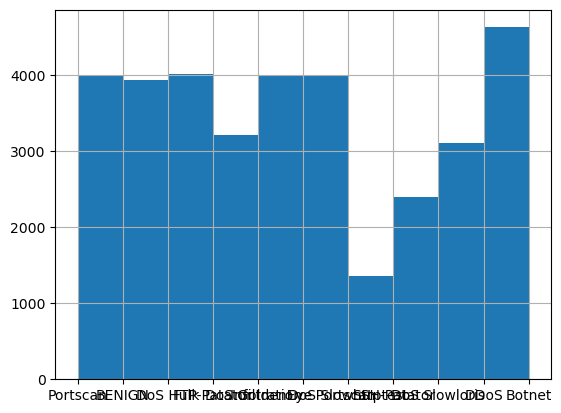

In [5]:
train_df['Label'].hist()

# Drop the benign data

In [10]:
non_benign_mask = train_df['Label'] != "BENIGN"
train_df = train_df[non_benign_mask]
train_df['Label'].unique()

array(['Portscan', 'DoS Hulk', 'FTP-Patator', 'DoS GoldenEye',
       'Infiltration - Portscan', 'DoS Slowhttptest', 'SSH-Patator',
       'DoS Slowloris', 'DDoS', 'Botnet'], dtype=object)

# Setup Autogluon - train model

In [25]:
predictor = TabularPredictor(label='Label', eval_metric= 'mcc').fit(train_df, fit_weighted_ensemble=False, time_limit=300)

No path specified. Models will be saved in: "AutogluonModels/ag-20250521_061025"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.12
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.4.0: Fri Apr 11 18:32:05 PDT 2025; root:xnu-11417.101.15~117/RELEASE_ARM64_T8132
CPU Count:          10
Memory Avail:       3.33 GB / 16.00 GB (20.8%)
Disk Space Avail:   173.43 GB / 460.43 GB (37.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize a

[1000]	valid_set's multi_logloss: 0.0312874	valid_set's mcc: 0.98561
[2000]	valid_set's multi_logloss: 0.0243665	valid_set's mcc: 0.989172
[3000]	valid_set's multi_logloss: 0.0213405	valid_set's mcc: 0.99054


	0.991	 = Validation score   (mcc)
	39.73s	 = Training   runtime
	0.26s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 247.33s of the 247.33s of remaining time.
	0.9982	 = Validation score   (mcc)
	8.47s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestGini ... Training model for up to 238.83s of the 238.83s of remaining time.
	0.9788	 = Validation score   (mcc)
	1.06s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestEntr ... Training model for up to 237.68s of the 237.67s of remaining time.
	0.9775	 = Validation score   (mcc)
	1.1s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 236.49s of the 236.49s of remaining time.
	0.9973	 = Validation score   (mcc)
	185.26s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesGini ... Training model for up to 51.16s of the 51.15s of remaining time.
	0.9757	 = Validation score   (mcc

# Import test data and check leaderboard on testing data

<Axes: >

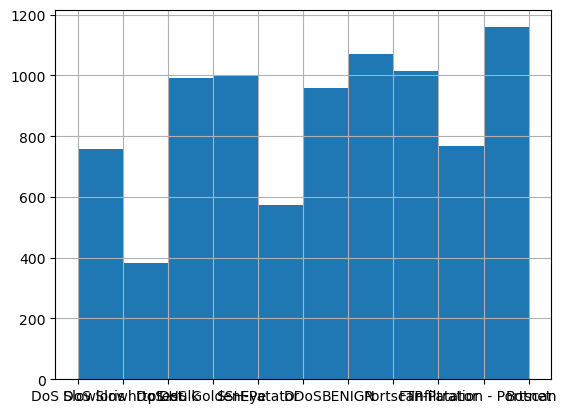

In [30]:
test_df = pd.read_csv('cic_ids_2017_test.csv')
test_df['Label'].hist()

# Remove benign data from test

In [31]:
non_benign_mask = test_df['Label'] != "BENIGN"
test_df = test_df[non_benign_mask]
test_df['Label'].unique()

array(['DoS Slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'SSH-Patator', 'DDoS', 'Portscan', 'FTP-Patator',
       'Infiltration - Portscan', 'Botnet'], dtype=object)

In [32]:
predictor.leaderboard(test_df)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.996585,0.997289,mcc,0.098565,0.018299,185.258208,0.098565,0.018299,185.258208,1,True,8
1,LightGBM,0.995989,0.998193,mcc,0.060551,0.014098,8.467639,0.060551,0.014098,8.467639,1,True,5
2,XGBoost,0.993464,0.997291,mcc,0.043452,0.007858,2.433414,0.043452,0.007858,2.433414,1,True,11
3,LightGBMXT,0.989158,0.990987,mcc,0.996225,0.258117,39.733840,0.996225,0.258117,39.733840,1,True,4
4,RandomForestGini,0.977290,0.978824,mcc,0.098135,0.025841,1.063657,0.098135,0.025841,1.063657,1,True,6
5,RandomForestEntr,0.975955,0.977489,mcc,0.085425,0.026833,1.095395,0.085425,0.026833,1.095395,1,True,7
6,ExtraTreesGini,0.973739,0.975682,mcc,0.120082,0.026770,0.522375,0.120082,0.026770,0.522375,1,True,9
7,ExtraTreesEntr,0.972558,0.974334,mcc,0.096778,0.024749,0.555238,0.096778,0.024749,0.555238,1,True,10
8,KNeighborsDist,0.961964,0.966858,mcc,0.214069,0.051258,0.014276,0.214069,0.051258,0.014276,1,True,2
9,NeuralNetFastAI,0.959017,0.965204,mcc,0.050898,0.011250,12.262189,0.050898,0.011250,12.262189,1,True,3


In [33]:
predictor.evaluate(test_df)

{'mcc': np.float64(0.9959890078070321),
 'accuracy': 0.9964469009080142,
 'balanced_accuracy': np.float64(0.9968041413426123)}

In [34]:
predictor.feature_importance(test_df, subsample_size=5000, num_shuffle_sets=10)

These features in provided data are not utilized by the predictor and will be ignored: ['bidirectional_min_ps', 'bidirectional_stddev_piat_ms', 'bidirectional_urg_packets', 'bidirectional_cwr_packets', 'bidirectional_ece_packets', 'src2dst_urg_packets', 'dst2src_urg_packets']
Computing feature importance via permutation shuffling for 41 features using 5000 rows with 10 shuffle sets...
	17.18s	= Expected runtime (1.72s per shuffle set)
	10.4s	= Actual runtime (Completed 10 of 10 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
src2dst_bytes,1.756873e-01,3.510470e-03,4.081572e-17,10,1.792949e-01,1.720796e-01
dst_port,1.556275e-01,2.479332e-03,5.317041e-18,10,1.581755e-01,1.530795e-01
src_port,1.275155e-01,5.356027e-03,3.254929e-14,10,1.330198e-01,1.220111e-01
bidirectional_mean_piat_ms,6.421397e-02,3.613676e-03,4.504648e-13,10,6.792770e-02,6.050024e-02
src2dst_max_ps,5.311236e-02,3.559610e-03,2.160401e-12,10,5.677053e-02,4.945419e-02
dst2src_min_piat_ms,3.437057e-02,2.731470e-03,9.946226e-12,10,3.717767e-02,3.156347e-02
dst2src_packets,2.070169e-02,2.146759e-03,1.073306e-10,10,2.290789e-02,1.849549e-02
dst2src_stddev_piat_ms,1.939035e-02,1.643818e-03,1.773374e-11,10,2.107968e-02,1.770101e-02
bidirectional_min_piat_ms,1.454434e-02,1.240893e-03,1.877593e-11,10,1.581959e-02,1.326909e-02
dst2src_max_piat_ms,8.581500e-03,9.911010e-04,2.803045e-10,10,9.600043e-03,7.562958e-03


In [29]:
# will return the path to the cloned predictor, identical to save_path_clone_opt
path_clone_opt = predictor.clone_for_deployment(path='non_persistent_model')

Cloned TabularPredictor located in '/Users/navya/Documents/Uni/Repos/modular_ids_framework/AutogluonModels/ag-20250521_061025' to 'non_persistent_model'.
	To load the cloned predictor: predictor_clone = TabularPredictor.load(path="non_persistent_model")
Clone: Keeping minimum set of models required to predict with best model 'LightGBM'...
Deleting model KNeighborsUnif. All files under /Users/navya/Documents/Uni/Repos/modular_ids_framework/non_persistent_model/models/KNeighborsUnif will be removed.
Deleting model KNeighborsDist. All files under /Users/navya/Documents/Uni/Repos/modular_ids_framework/non_persistent_model/models/KNeighborsDist will be removed.
Deleting model NeuralNetFastAI. All files under /Users/navya/Documents/Uni/Repos/modular_ids_framework/non_persistent_model/models/NeuralNetFastAI will be removed.
Deleting model LightGBMXT. All files under /Users/navya/Documents/Uni/Repos/modular_ids_framework/non_persistent_model/models/LightGBMXT will be removed.
Deleting model Ra

In [38]:
print('daintysquish <3')

daintysquish <3
